In [7]:
import torchaudio
import torch
from matplotlib import pyplot as plt

In [8]:
aa = r'C:\Users\kongbai\study\develop\VoiceWakeUpEngine\dataset\train\20250124155336_0.wav'
waveform, sample_rate = torchaudio.load(aa)
# torchaudio.load()从文件或类似文件的对象中加载音频数据
# 返回元组，包含音频波形的Tensor和采样率的整数. 如果输入文件是整数WAV格式且未进行归一化，则返回的Tensor为整数类型，否则为float32类型. 如果channels_first=True，则Tensor的维度为[通道, 时间]，否则为[时间, 通道]

# uri(Union[BinaryIO, str, PathLike])音频数据来源，文件路径或类似文件的对象
# frame_offset(int, 可选)在开始读取数据之前要跳过的帧数，默认为0
# num_frames(int, 可选)要读取的最大帧数，默认为-1，读取所有剩余的样本
# normalize(bool, 可选)当为True时，将原生样本类型转换为float32类型，默认为True. 如果输入文件是整数WAV格式，设置为False将返回整数类型的Tensor
# channels_first(bool, 可选)当为True时，返回的Tensor的维度为[通道, 时间]，否则为[时间, 通道]，默认为True
# format(str或None, 可选)如果不为None，则被视为提示，可能允许后端覆盖检测到的格式，默认为None
# buffer_size(int, 可选)在处理类似文件的对象时使用的缓冲区大小，默认为4096字节
# backend(str或None, 可选)I/O后端，如果为None，则根据输入和可用的后端选择后端，否则必须是ffmpeg, sox, soundfile中的一个，默认为None
print(waveform.size())
print(sample_rate)
print(type(waveform))
print(type(sample_rate))

torch.Size([1, 441000])
44100
<class 'torch.Tensor'>
<class 'int'>


In [9]:
class FirstOrderHighPassFilter:
    def __init__(self, mu):
        self.mu = mu
        self.buffer = None

    def filter(self, input_signal):
        if self.buffer is None:
            self.buffer = torch.zeros_like(input_signal)
        output_signal = (1 - self.mu) * (input_signal - self.buffer)
        self.buffer = input_signal
        return output_signal

In [13]:
aA = FirstOrderHighPassFilter(mu=0.9)
aaa = aA.filter(waveform)

In [14]:
print(aaa.size())
print(type(aaa))


torch.Size([1, 441000])
<class 'torch.Tensor'>


In [15]:
vie = torchaudio.transforms.Spectrogram(
    n_fft=1024,
    hop_length=512,
    win_length=1024,
    window_fn=torch.hamming_window,
    power=2
)

In [16]:
spec = vie(waveform)

In [17]:
print(spec.size())

torch.Size([1, 513, 862])


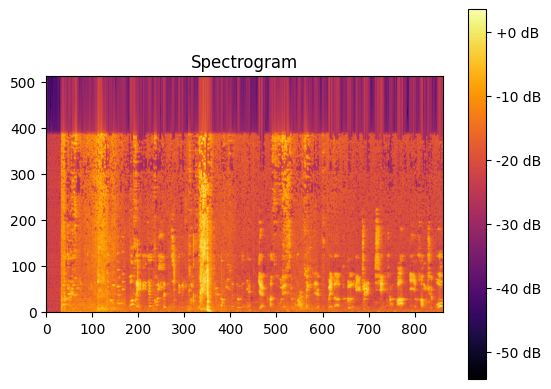

In [18]:
plt.imshow(spec[0].log2().numpy(), cmap='inferno', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()